In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from importlib import reload

import train as t
import model
import loss
import utils

In [2]:
reload(utils)

<module 'utils' from '/users/invites/jmorlot/Documents/Projects/Seq2Seq_Nucleosom/utils.py'>

In [3]:
reload(model)

<module 'model' from '/users/invites/jmorlot/Documents/Projects/Seq2Seq_Nucleosom/model.py'>

In [4]:
reload(t)

<module 'train' from '/users/invites/jmorlot/Documents/Projects/Seq2Seq_Nucleosom/train.py'>

In [5]:
rm -rf logs/

In [6]:
s2s = t.Seq2Seq(fasta_path='Nucleosom_data/Reference sequence-chrI-1..230218.fasta',
                histone_path='Nucleosom_data/Chereji_2018_Occupancy_H3_CC_V64-chrI-1..230218.bedgraph',
                input_size=5,
                output_size=1,
                batch_size=32,
                seq_len_DNA=100,
                seq_len_hist=100,
                Nepochs=1,
                hidden_size=32,
                dropout_p=0.2,
                n_layers=5)

In [7]:
s2s.train()

train:   0%|          | 0/57 [00:00<?, ?it/s]/users/invites/jmorlot/Documents/Projects/Seq2Seq_Nucleosom/train.py:334: RuntimeWarning: Mean of empty slice.
  info[prefix] =  np.array(self.loss_record[p]).mean()
/users/invites/jmorlot/anaconda2/envs/GPU/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

train: 100%|██████████| 57/57 [01:24<00:00,  1.46s/it]

100%|██████████| 1/1 [01:33<00:00, 93.32s/it]


In [9]:
decoder_outputs, attention_list = s2s.predict(fasta_path='Nucleosom_data/Reference sequence-chrI-1..230218.fasta')

validation: 57it [00:33,  1.69it/s]                        


In [17]:
import torch
xs=[]
ys=[]
for x,y in s2s.train_loader:
    xs.append(x)
    ys.append(y)
xs = torch.cat(xs,0).cpu().numpy()
ys = torch.cat(ys,0).cpu().numpy()

In [18]:
print(decoder_outputs.shape,ys.shape)

(1824, 1, 100) (1824, 1, 100)


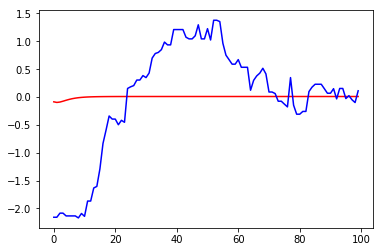

In [19]:
plt.plot(decoder_outputs[10,0,:],'r')
plt.plot(ys[10,0,:],'b')
plt.show()

In [14]:
#Reload model changes
reload(t)
s2s2 = t.Seq2Seq(fasta_path='Nucleosom_data/Reference sequence-chrI-1..230218.fasta',
                histone_path='Nucleosom_data/Chereji_2018_Occupancy_H3_CC_V64-chrI-1..230218.bedgraph',
                input_size=5,
                output_size=1,
                batch_size=32,
                seq_len_DNA=100,
                seq_len_hist=100,
                Nepochs=1,
                hidden_size=32,
                dropout_p=0.2,
                n_layers=5)
s2s2.__dict__ = s2s.__dict__ 
s2s = t.Seq2Seq(fasta_path='Nucleosom_data/Reference sequence-chrI-1..230218.fasta',
                histone_path='Nucleosom_data/Chereji_2018_Occupancy_H3_CC_V64-chrI-1..230218.bedgraph',
                input_size=5,
                output_size=1,
                batch_size=32,
                seq_len_DNA=100,
                seq_len_hist=100,
                Nepochs=1,
                hidden_size=32,
                dropout_p=0.2,
                n_layers=5)
s2s.__dict__  = s2s2.__dict__
del s2s2

In [15]:
import torch
a=torch.rand(1)
if (a>0.5):
    print(a)